# Time Series as Inputs to a Model
  
The easiest way to incorporate time series into your machine learning pipeline is to use them as features in a model. This chapter covers common features that are extracted from time series in order to do machine learning.

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)  # sizing figures
plt.style.use('seaborn-v0_8')  # Nice style for time series data

*Styles in Matplotlib for the expression above*  
  
`plt.style.use('`[Matplotlib Style Sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)`')`


## Classification and feature engineering
  
We'll now discuss one of the most common categories of machine learning problems: classification. We'll also discuss the concept of feature engineering in the context of time series data.
  
**Always visualize raw data before fitting models**
  
Before we begin, let's take a moment to once again visualize the data we're dealing with. There is a lot of complexity in any machine learning step, and visualizing your raw data is important to make sure you know where to begin.
  
**Visualize your timeseries data!**
  
`ixs = np.arange(audio.shape[-1])`  
`time = ixs/sfreq`  
`fig, ax = plt.subplots()`
`ax.plot(time, audio)`  
  
To plot raw audio, we need two things: the raw audio waveform, usually in a 1- or 2-dimensional array. We also need the timepoint of each sample. We can calculate the time by dividing the index of each sample by the sampling frequency of the timeseries. This gives us the time for each sample relative to the beginning of the audio.
  
**What features to use?**
  
As we saw in the introduction, using raw data as input to a classifier is usually too noisy to be useful. An easy first step is to calculate summary statistics of our data, which removes the "time" dimension and give us a more traditional classification dataset.
  
**Summarizing timeseries with features**
  
<img src="../_images/timeseries-summary-stat-features.png" alt="Alt text" width="600">  
  
Here we see a description of this process. For each timeseries, we calculate several summary statistics. These then can be used as features for a model. We have expanded a single feature (raw audio amplitude) to several features (here, the min, max, and average of each sample).
  
**Calculating multiple features**
  
<img src="../_images/calculate-multiple-feat-audio-timeseries.png" alt="Alt text" width="800">  

Here we show how to calculate multiple features for a several timeseries. By using the `axis=1` parameter, we collapse across the last dimension, which is time. The result is an array of numbers, one per timeseries.
  
**Fitting a classifier with scikit-learn**
  
In the last step, we collapsed a two-dimensional array into a one-dimensional array for each feature of interest. We can then combine these as inputs to a model. In the case of classification, we also need a label for each timeseries that allows us to build a classifier.
  
**Preparing your features for scikit-learn**
  
<img src="../_images/prepare-audio-ts-sklean.png" alt="Alt text" width="800">  

In order to prepare your data for scikit-learn, remember to ensure that it has the correct shape, which is samples by features. Here we can use the `column_stack()` function, which lets us stack arrays by turning them into the columns of a two-dimensional array. In addition, the labels array is 1-dimensional, so we reshape it so that it is two dimensions. Finally, we fit our model to these arrays, X and y.
  
**Scoring your scikit-learn model**
  
<img src="../_images/scoring-sklearn-audio-ts.png" alt="Alt text" width="800">  
  
Now that we've fit our model, we'll score the classifier. There are many ways that we can score a classifier with scikit-learn. First, we show how to generate predictions with a model that has been fit to data. If we have separate test data, we can use the `.predict()` method to generate a predicted list of classes for each sample. We can then calculate a score by dividing the total number of correct predictions by the total number of test samples. Alternatively, we can use the `accuracy_score()` function that's built into scikit-learn by passing the test set labels and the predictions.

**What is sampling frequency?**
  
Sampling frequency, also known as sampling rate, is a fundamental concept in digital signal processing and refers to the number of samples taken per unit of time from a continuous analog signal. It determines the granularity or resolution of the digital representation of the signal.
  
In simpler terms, the sampling frequency indicates how many times per second a measurement or sample is taken from an analog signal to convert it into a discrete digital signal. It is typically expressed in hertz (Hz) and represents the number of samples collected per second.
  
The choice of an appropriate sampling frequency depends on the specific application and the characteristics of the signal being sampled. In some cases, a higher sampling frequency is required to accurately capture high-frequency components of the signal, while in other cases, a lower sampling frequency may be sufficient.
  
It's important to ensure that the sampling frequency is set appropriately to avoid aliasing and loss of information during the analog-to-digital conversion process.
  
**Sampling Frequency/Rate**
  
Formula:
  
$f_s = \frac{N}{T}$
  
where:
  
- $N$: represents the number of observations.
- $T$: is the time interval or duration.

For example, if you have 8820 observations evenly distributed over a time interval of 4 seconds, the equation becomes:
  
$f_s = \frac{8820}{4} = 2205 \, \text{Hz}$
  
This means that the sampling frequency is 2205 Hz, indicating that you have collected 8820 observations at a rate of 2205 Hertz per second. The equation for calculating the sampling frequency ($Fs$) can be derived from the Nyquist-Shannon sampling theorem. 
  
---

**Nyquist-Shannon sampling theorem**
  
Formula:
  
$F_s \geq 2 \cdot F_{\text{max}}$
  
Where:
  
- $Fs$: is the sampling frequency (in Hz) or the number of samples taken per second.  
- $Fmax$: is the maximum frequency component in the analog signal (in Hz).  
  
The Nyquist-Shannon sampling theorem, also known as the Nyquist-Shannon sampling criterion or simply the Nyquist theorem, is a fundamental concept in digital signal processing. It provides a guideline for properly sampling analog signals to avoid aliasing and enable accurate reconstruction from the sampled data. The theorem, formulated by Harry Nyquist and Claude Shannon, states that in order to accurately reconstruct a continuous-time analog signal from its discrete samples, the sampling frequency should be at least twice the highest frequency component present in the signal. 
  
According to the Nyquist-Shannon theorem, if the sampling frequency is chosen to be greater than or equal to twice the maximum frequency, the original analog signal can be reconstructed without any loss of information.
  
The Nyquist-Shannon sampling theorem forms the basis for determining the appropriate sampling rate in various digital signal processing applications, including audio and image processing. It ensures that the discrete representation of a continuous signal captures all the necessary information for faithful reconstruction.

---

### Many repetitions of sounds
  
In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.
  
You'll use the heartbeat data described in the last chapter. Some recordings are *normal* heartbeat activity, while others are *abnormal* activity. Let's see if you can spot the difference.
  
Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function `show_plot_and_make_titles()` is also available in your workspace (I have to replicate this function).
  
1. First, create the time array for these audio files (all audios are the same length).
  
2. Then, stack the values of the two DataFrames together (normal and abnormal, in that order) so that you have a single array of shape (n_audio_files, n_times_points).
  
3. Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.
  
4. You'll plot normal heartbeats in the left column, and abnormal ones in the right column

In [196]:
# Recreating function
def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()

In [197]:
# Loading the required dataset
normal = pd.read_csv('../_datasets/normal_sound.csv', index_col=0)
abnormal = pd.read_csv('../_datasets/abnormal_sound.csv', index_col=0)
sfreq = 2205

In [198]:
normal.head()

,3,4,6
time,,,
0.000000,-0.000995,0.000281,0.002953
0.000454,-0.003381,0.000381,0.003034
0.000907,-0.000948,0.000063,0.000292
0.001361,-0.000766,0.000026,-0.005916
0.001814,0.000469,-0.000432,-0.005307


In [199]:
abnormal.head()

,0,1,2
time,,,
0.000000,-0.024684,-0.024507,0.008254
0.000454,-0.060429,-0.047736,0.014809
0.000907,-0.070080,-0.039938,0.010475
0.001361,-0.084212,-0.041199,0.010272
0.001814,-0.085111,-0.036050,0.008580


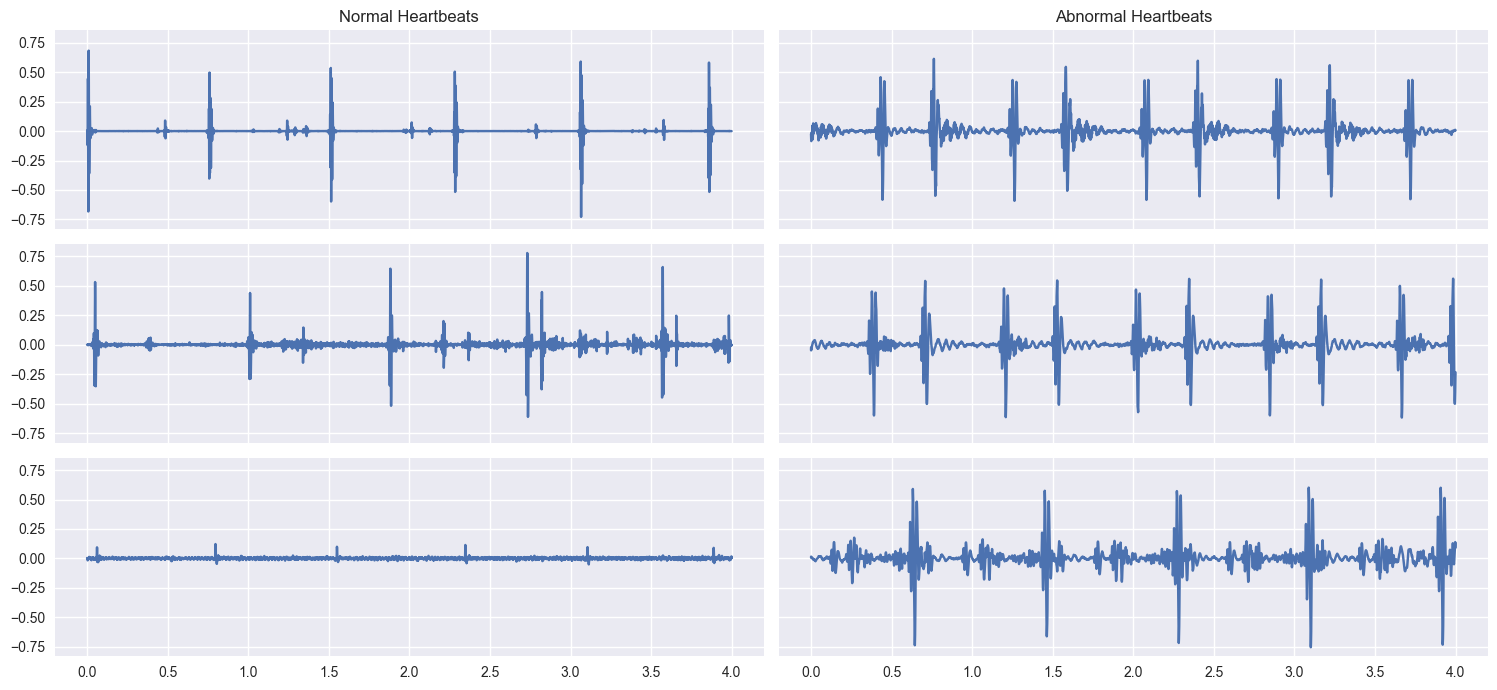

In [200]:
# Create a figure with a grid of subplots
# - 3 rows, 2 columns
# - Figure size: width=15 units, height=7 units
# - Share x-axis and y-axis across subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(len(normal)) / sfreq

# Stack the 'normal' and 'abnormal' signals horizontally (along axis=1)
# Then transpose the result (swap the rows and columns)
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.

### Invariance in time
  
While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.
  
Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).
  
In this exercise, you'll average across many instances of each class of heartbeat sound.
  
The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.  
  
1. Average across the audio files contained in normal and abnormal, leaving the time dimension.
  
2. Visualize these averages over time.

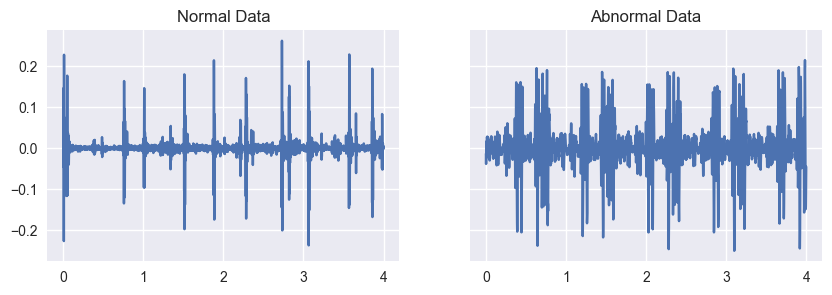

In [201]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.

### Build a classification model
  
While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.
  
1. Create an instance of the Linear SVC model and fit the model using the training data.
  
2. Use the testing data to generate predictions with the model.
  
3. Score the model using the provided code.

In [202]:
# Loading required datasets
normal = pd.read_csv('../_datasets/heart_normal.csv', index_col=0)
abnormal = pd.read_csv('../_datasets/heart_abnormal.csv', index_col=0)

print(normal.shape)
print(abnormal.shape)

(8820, 29)
(8820, 31)


In [203]:
pd.set_option('display.max_columns', 100)  # fixing column display
normal.head()

,3,4,6,7,10,12,15,16,17,18,20,21,24,25,26,27,31,32,33,34,38,39,40,43,48,49,51,52,55
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,-0.000995,0.000281,0.002953,0.005497,0.000433,0.001316,-0.001694,0.000211,0.000042,0.001092,-3.175223e-05,-0.001689,0.008869,-0.015397,0.000050,0.002635,0.002147,0.000139,0.000903,0.023688,0.000369,0.000026,0.002742,0.000618,-0.007847,-0.003252,0.008799,-0.361737,-0.001609
0.000454,-0.003381,0.000381,0.003034,0.010088,0.000554,-0.000154,-0.002157,-0.001945,-0.000146,-0.005554,5.896715e-07,-0.001325,0.008964,-0.026478,-0.000039,0.003921,0.005887,-0.000225,0.002540,0.046644,0.000980,-0.000063,0.002161,0.000476,-0.018061,0.007291,0.017107,-0.651842,-0.004319
0.000907,-0.000948,0.000063,0.000292,0.008272,0.000232,-0.001945,0.000619,0.006148,0.000048,-0.001297,-1.282396e-04,0.010142,-0.007193,-0.041879,-0.000011,0.000509,0.007177,-0.000779,0.002638,0.039666,0.000765,-0.000043,0.001553,-0.000024,-0.017164,0.016447,0.015018,-0.365683,0.000573
0.001361,-0.000766,0.000026,-0.005916,0.009358,0.000538,-0.001429,0.002182,-0.000340,0.001091,-0.002012,3.549543e-05,0.009773,-0.011304,-0.064017,0.000044,0.000532,0.007889,-0.000424,0.002503,0.046120,0.000638,-0.000009,0.004452,0.000007,-0.015996,0.018959,0.017465,-0.173468,-0.001807
0.001814,0.000469,-0.000432,-0.005307,0.009418,0.001081,-0.002623,0.004176,-0.003359,-0.000170,0.001939,-2.608701e-05,0.004106,-0.002411,-0.053894,-0.000039,-0.000217,0.007446,-0.000544,0.000882,0.041412,0.000054,-0.000215,-0.002014,-0.000658,-0.010558,0.020568,0.018050,0.141141,-0.007140


`np.random.choice(normal.shape[1], size=22, replace=False)`:  
  
This function call generates a random sample of unique numbers from the range of 0 to `normal.shape[1]` - 1. Where `normal.shape[1]` retrieves the number of columns in the normal array. The `size=22` argument specifies the number of random samples to generate, `replace=False` ensures that the samples are unique and not repeated, and lastly `.tolist()` converts the generated random samples, which are originally in the form of a NumPy array, into a Python list.

In [204]:
# NORMAL TRAIN: Selecting 22 columns by name at random, and placing them into a list for subsetting
normal_train_idx = np.random.choice(normal.shape[1], size=22, replace=False).tolist()

# NORMAL TEST: Taking the remainder of the columns not selected in train
normal_test_idx = list(set(np.arange(normal.shape[1]).tolist()) - set(normal_train_idx))

# ABNORMAL TRAIN: Selecting 20 columns by name at random, and placing them into a list for subsetting
abnormal_train_idx = np.random.choice(abnormal.shape[1], size=20, replace=False).tolist()

# ABNORMAL TEST: Taking the remainder of the columns not selected in train
abnormal_test_idx = list(set(np.arange(abnormal.shape[1]).tolist()) - set(abnormal_train_idx))

# Subsetting with the lists, then concatenating normal and abnormal X/feature sets on top of another, for each Train/test split
X_train = pd.concat([normal.iloc[:, normal_train_idx], 
                     abnormal.iloc[:, abnormal_train_idx]], axis=1).to_numpy().T  # T for transpose

X_test = pd.concat([normal.iloc[:, normal_test_idx], 
                    abnormal.iloc[:, abnormal_test_idx]], axis=1).to_numpy().T  # T for transpose

# Generating arrays of the target values ('normal', 'abnormal') in the same index-dimensional space as X/feature sets, st. vector
y_train = np.array(['normal'] * len(normal_train_idx) + ['abnormal'] * len(abnormal_train_idx))
y_test = np.array(['normal'] * len(normal_test_idx) + ['abnormal'] * len(abnormal_test_idx))

In [205]:
from sklearn.svm import LinearSVC


# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))  # np.squeeze() does a dimensionality compression/transformation

0.5555555555555556


Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.

## Improving the features we use for classification
  
What we've just performed is feature engineering of our audio data. Next, we'll cover a few more features that are more unique to timeseries data.  
  
**The auditory envelope**
  
We'll begin by calculating the "envelope" of each heartbeat sound. The envelope throws away information about the fine-grained changes in the signal, focusing on the general shape of the audio waveform. To do this, we'll need to calculate the audio's amplitude, then smooth it over time.  
  
<img src='../_images/envelope-process-heartbeat-sound.png' alt='Alt text' width='800'>
  
**Smoothing over time**
  
First, we'll remove noise in timeseries data by smoothing it with a rolling window. This means defining a window around each timepoint, calculating the mean of this window, and then repeating this for each timepoint.  
  
**Smoothing your data**
  
<img src='../_images/smoothing-ot-mean.png' alt='Alt text' width='800'>

For example, on the left we have a noisy timeseries as well as an overlay of several small windows. Each timepoint will be replaced by the mean of the window just before it. The result is a smoother signal over time which you can see on the right. 
  
**Calculating a rolling window statistic**
  
<img src='../_images/rolling-window-heartbeat.png' alt='Alt text' width='800'>
  
Let's cover how to do this with Pandas. We first use the `.rolling()` method of our dataframe, which returns an object that can be used to calculate many different statistics within each window. The `window=` parameter tells us how many timepoints to include in each window. The larger the window, the smoother the result will be.  
  
**Calculating the auditory envelope**
  
<img src='../_images/calc-rectification-rolling.png' alt='Alt text' width='800'>
  
Now that we know how to smooth our data, we can calculate the auditory envelope of our signal. First, we calculate the "absolute value" of each timepoint. This is also called "rectification", because you ensure that all time points are positive. Next, we calculate a rolling mean to smooth the signal. Let's see what these transformations look like.  
  
**The raw signal**
  
First, we'll take a look at the raw audio signal.  
  
<img src='../_images/heartbeat-raw-sig.png' alt='Alt text' width='800'>
  
**Rectify the signal**
  
Next, we take the absolute value of each timepoint.  
  
<img src='../_images/heartbeat-abs-sig.png' alt='Alt text' width='800'>
  
**Smooth the signal**
  
Finally, we smooth the rectified signal. The result is a smooth representation of how the audio energy changes over time.
  
<img src='../_images/heartbeat-smoothed-sig.png' alt='Alt text' width='800'>
  
**Feature engineering the envelope**
  
Once we've calculated the acoustic envelope, we can create better features for our classifier. Here we'll calculate several common statistics of each auditory envelope, and combine them in a way that scikit-learn can use.
  
<img src='../_images/feat-engineering-envelope.png' alt='Alt text' width='800'>
  
**Preparing our features for scikit-learn**
  
We'll then stack these features together with the same function we've used before. Even though we're calculating the same statistics (avg, standard deviation, and max), they are on different features, and so have different information about the stimulus.

`X = np.column_stack([envelope_mean, envelope_std, envelope_max])`  
`y= labels.reshape(-1, 1)`  
  
**Cross validation for classification**
  
Now that our features are defined, lets fit a classifier and see how it performs. We'll use cross-validation in order to train and test the model on different subsets of data. We can use a single function to combine the steps of splitting data into training and validation sets, fitting the model on training data, and scoring predictions on validation data. Using `cross_val_score()` will generate a list of scores across different "splits" of our data.
  
**Using cross_val_score**
  
To use it, pass an instance of a scikit-learn model as the first parameter, and the X and y data as second and third parameters. You can configure the strategy that scikit-learn uses to split the data with the CV parameter. Passing an integer will determine the number of splits that are made (and the number of scores generated).
  
**Auditory features: The Tempogram**
  
There are several more advanced features that can be calculated with timeseries data. Each attempts to detect particular patterns over time, and summarize them statistically. For example, a tempogram tells us the "tempo" of the sound at each moment. We'll show how to calculate it using a popular tool for audio analysis in Python called librosa.
  
**Computing the tempogram**
  
Here we show how librosa can be used to extract the tempogram from an audio array. This tells us the moment-by-moment tempo of the sound. We can then use this to calculate features for our classifier.

### Calculating the envelope of sound
  
One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.
  
A heartbeat file is available in the variable audio.
  
1. Visualize the raw audio you'll use to calculate the envelope.  
2. Rectify the audio and Plot the result.  
3. Smooth the audio file by applying a rolling mean, then plot the result.

In [206]:
import librosa as lr


# Loading the audio file
audio, sfreq = lr.load('../_datasets/heartbeat-audio-files/murmur__201108222238.wav')

# Acquiring the timeframe by going from 0 to the length of the dataset, then dividing by signal frequency
time = np.arange(0, len(audio)) / sfreq

# Transforming into a dataframe
audio = pd.DataFrame(audio)
audio.shape

(174979, 1)

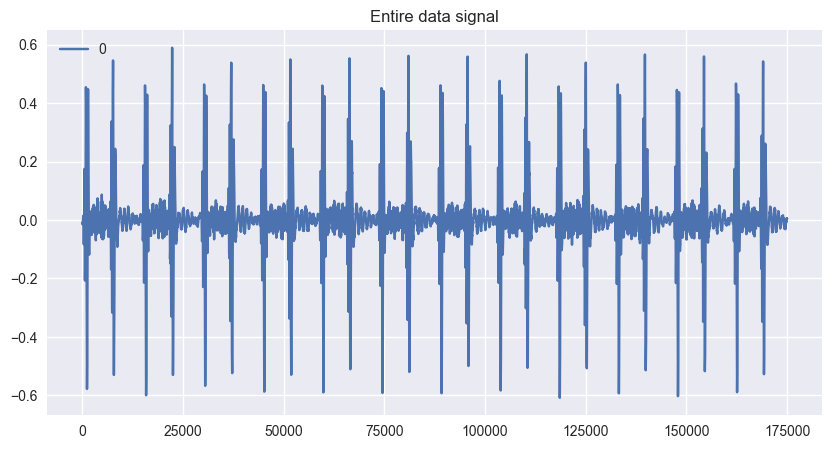

In [207]:
# Plot the raw data first, this is just to get a general idea of what we are looking at
audio.plot(figsize=(10, 5))
plt.title('Entire data signal')
plt.show()

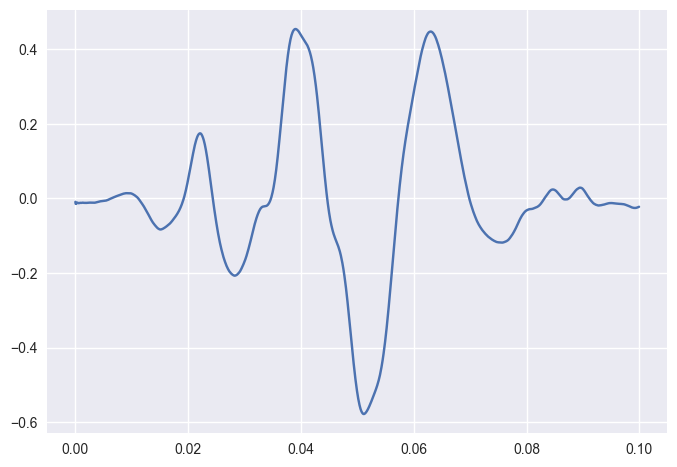

In [208]:
# Plotting a specific point in the dataset that we will use for this example
plt.plot(time[:2205], audio[:2205])

Below I am balancing/normalizing the signal by applying the absolute value to it. 

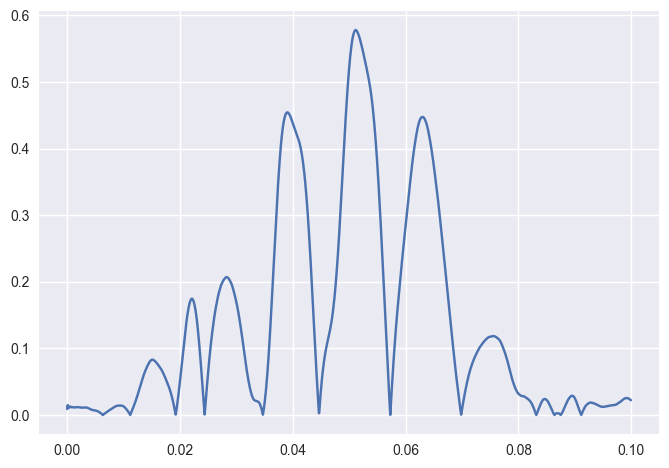

In [209]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
plt.plot(time[:2205], audio_rectified[:2205])

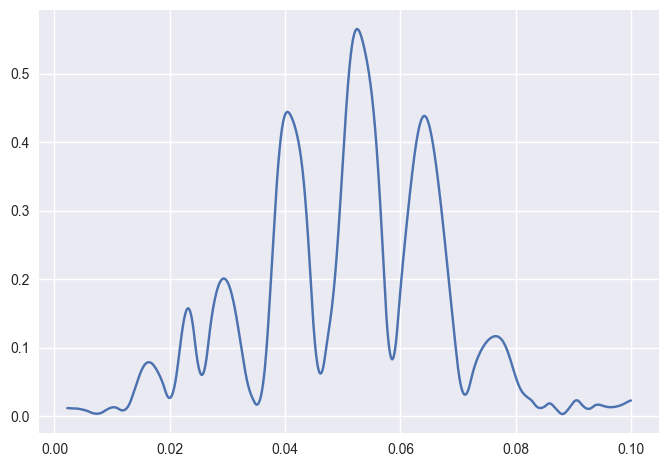

In [210]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
plt.plot(time[:2205], audio_rectified_smooth[:2205])
plt.show()

By calculating the envelope of each sound and smoothing it, you've eliminated much of the noise and have a cleaner signal to tell you when a heartbeat is happening.

### Calculating features from the envelope
Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.
  
audio_rectified_smooth from the previous exercise is available in your workspace.  
  
1. Calculate the mean, standard deviation, and maximum value for each heartbeat sound.
2. Column stack these stats in the same order.
3. Use cross-validation to fit a model on each CV iteration.

```from sklearn.model_selection import cross_val_score


# Calculating statistics
means = np.mean(audio_rectified_smooth[:2205], axis=0)
stds = np.std(audio_rectified_smooth[:2205], axis=0)
maxs = np.max(audio_rectified_smooth[:2205], axis=0)

labels = np.array(['murmur', 'murmur', 'murmur', 'normal', 'normal', 'murmur', 'normal', 'normal',
 'murmur', 'murmur', 'normal', 'murmur', 'normal', 'murmur', 'murmur', 'normal',
 'normal', 'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur',
 'normal', 'normal', 'normal', 'normal', 'murmur', 'murmur', 'murmur', 'normal',
 'normal', 'normal', 'normal', 'murmur', 'murmur', 'murmur', 'normal', 'normal',
 'normal', 'murmur', 'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur',
 'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur', 'normal',
 'murmur', 'murmur', 'murmur', 'murmur'])

# Create the X and y array
X = np.column_stack([means, stds, maxs])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
  
<script.py> output:
    0.7166666666666667
```

Correct! This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data).

### Derivative features: The tempogram  
One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the envelope calculation you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use `librosa` to compute some tempo and rhythm features for heartbeat data, and fit a model once more.
  
Note that librosa functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the `.values` attribute.
  
1. Use `librosa` to calculate a tempogram of each heartbeat audio. Calculate the mean, standard deviation, and maximum of each tempogram (this time using DataFrame methods).
2. Column stack these tempo features (mean, standard deviation, and maximum) in the same order. Score the classifier with cross-validation.

```
# Loading the required dataset
audio = pd.read_csv('../_datasets/heart_normal.csv',index_col=0)

# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))
    
# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

<script.py> output:
    0.5
```

Correct! Note that your predictive power may not have gone up (because this dataset is quite small), but you now have a more rich feature representation of audio that your model can use!

NOTE: The reason that the code is in markdown and not Python is because they didn't provide proper information on how they obtained the y values in comparison to how they told me to get the y_train and y_test values. there were some calculations ran behind closed doors to that I do not have access to in order to replicate.

## The spectrogram - spectral changes to sound over time
  
In this lesson, we'll discuss a special case of timeseries features: the spectrogram. Spectrograms are common in timeseries analysis, and we'll cover some basics to help you apply it to your machine learning problems.
  
**Fourier transforms**
  
To begin, we'll discuss a key part of the spectrogram: the Fourier Transform.  
This approach summarizes a time series as a collection of fast and slow-moving waves. The Fourier Transform (or FFT) is a way to tell us how these waves can be combined in different amounts to create our time series.
  
**A Fourier Transform (FFT)**
  
<img src='../_images/fourier-transform.png' alt='Alt text' width='800'>
  
On the left is a raw audio signal, and on the right is the Fourier Transform (or FFT) of the signal. This describes, for a window of time, the presence of fast- and slow-oscillations that are present in a timeseries. The slower oscillations are on the left (closer to 0) and the faster oscillations are on the right. This is a more rich representation of our audio signal.
  
**Spectrograms: combinations of windows Fourier transforms**
  
- A spectrogram is a collection of windowed Fourier transforms over time
  
We can calculate multiple fourier transforms in a sliding window to see how it changes over time. For each timepoint, we take a window of time around it, calculate a fourier transform for the window, then slide to the next window (similar to calculating the rolling mean). The result is a description of the fourier transform as it changes throughout the timeseries. This is called a short-time fourier transform or STFT.
  
Simular to how a rolling mean is calculated:
  
1. Choose a window shape and size
2. At a timepoint calculate the FFT (Fourier Transform) for that window
3. Slide the window over by one
4. Aggregate the results
- This is now a Short-time Fourier Transform (STFT)
  
**A Spectrogram Visualized**
  
<img src='../_images/spectrogram-example.png' alt='Alt text' width='400'>
  
To calculate the spectrogram, we square each value of the STFT. An example is shown here. Note how the spectral content of the sound changes over time. Because this is speech, we see interesting patterns that correspond to spoken words (e.g. vowels or consonants).
  
**Calculating the STFT**
  
We'll use librosa's `stft()` function to calculate a spectrogram. There are many parameters in this process, but we'll focus on the size of the window that is used. We'll calculate the STFT of our audio file, then convert the output to decibels to visualize it more cleanly with `specshow()` (which results in the visualized spectrogram).
  
**Calculating the STFT with code**
  
<img src='../_images/stft-code-example1.png' alt='Alt text' width='740'>

Here's how to compute an STFT with `librosa`. We first define the size of the window used for the STFT. Next, we calculate the STFT, then convert it to decibels using the `amplitude_to_db()` function, which ensures all values are positive, real numbers. Finally, we use the `specshow()` function, which lets us quickly visualize a spectrogram. This code was used to produce the image shown in the previous slide. Note that we're glossing over some complex details for how spectrograms are calculated, but are focusing on the essentials for the purpose of fitting models.
  
**Spectral feature engineering**
  
<img src= '../_images/spectral-feat-engineering.png' alt='Alt text' width='740'>

Each timeseries has a unique spectral pattern to it. This means we can use patterns in the spectrogram to distinguish classes from one another. For example, we can calculate the spectral centroid and bandwidth over time. These describe where most of the spectral energy lies over time.
  
**Calculating spectral features**
  
<img src= '../_images/calculate-spectral-features.png' alt='Alt text' width='740'>

To calculate the spectral centroid and bandwidth, we again turn to `librosa`. We'll use the `spectral_bandwidth()` and `spectral_centroid()` functions to calculate these values at each moment in time for the spectrogram we've computed. These functions could also accept a raw audio signal (in which case the STFT will be performed first). This visualization code is what produced the figure on the previous slide.
  
**Combining spectral and temporal features in a classifier**
  
<img src= '../_images/combine-spectral-temporal.png' alt='Alt text' width='740'>

In this chapter, we've calculated many different kinds of auditory features from our heartbeat sounds. As a final step, we can combine each of the features mentioned before into a single input matrix for our classifier. Here we calculate the mean value of the spectral centroid and bandwidth, and stack these into a single classifier input matrix. In general, as we include more complex features into our model, we'll improve model performance.

### Spectrograms of heartbeat audio  
  
*Spectral engineering is one of the most common techniques in machine learning for time series data.*  
  
The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.
  
We've loaded a single heartbeat sound in the variable audio.
  
1. Import the short-time fourier transform `stft()` function from `librosa.core`. Calculate the spectral content (using the short-time fourier transform function) of audio.
2. Convert the spectogram (spec) to decibels. Then visualize the spectogram.

In [211]:
# Import the stft and amplitude_to_db functions
from librosa.core import stft, amplitude_to_db


# Prepare the STFT
HOP_LENGTH = 2**4
# spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7) ## Not needed but in the exercise

# For the test
spec = pd.read_csv('../_datasets/spec.csv', index_col=0)
spec = spec.applymap(complex)
time = np.array(normal.index)
audio = pd.read_csv('../_datasets/audio.csv', index_col=0).to_numpy().squeeze()
sfreq = 2205

/var/folders/pf/_zjf_55d7mgb5llg516d7fyc0000gn/T/ipykernel_14258/2506227331.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)


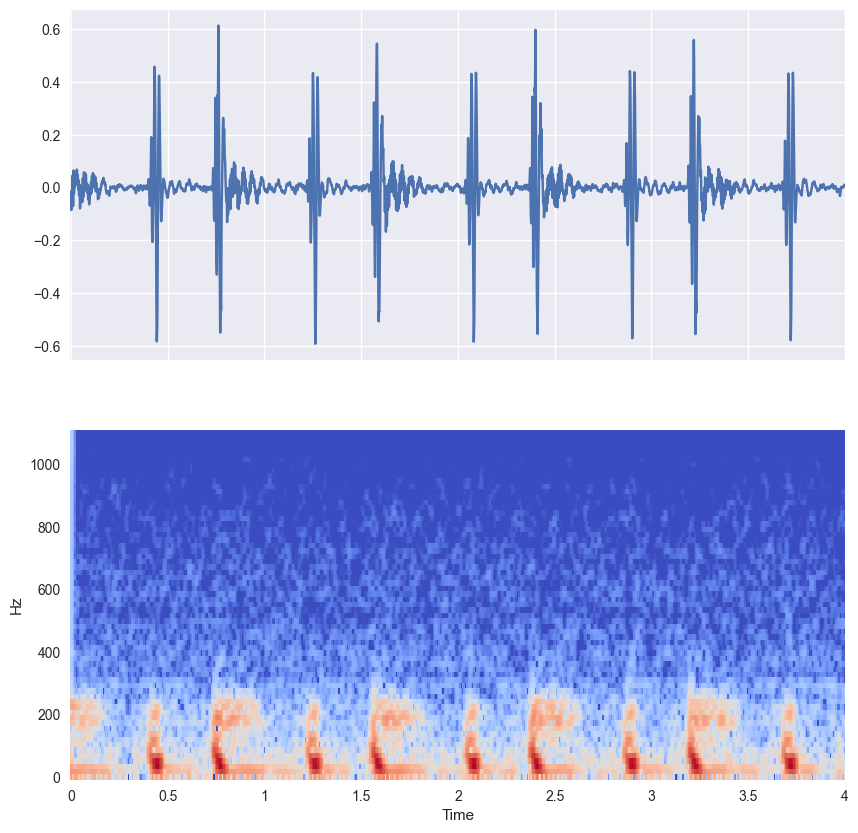

In [212]:
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time,audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)

Do you notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram?

### Engineering spectral features
  
As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.
  
The spectogram spec from the previous exercise is available in your workspace.
  
1. Calculate the spectral bandwidth as well as the spectral centroid of the spectrogram by using functions in `librosa.feature`.  
2. Convert the spectrogram to decibels for visualization. Plot the spectrogram over time.

In [213]:
# Hide
times_spec = np.array([ 0.        ,  0.00725624,  0.01451247,  0.02176871,  0.02902494,
        0.03628118,  0.04353741,  0.05079365,  0.05804989,  0.06530612,
        0.07256236,  0.07981859,  0.08707483,  0.09433107,  0.1015873 ,
        0.10884354,  0.11609977,  0.12335601,  0.13061224,  0.13786848,
        0.14512472,  0.15238095,  0.15963719,  0.16689342,  0.17414966,
        0.1814059 ,  0.18866213,  0.19591837,  0.2031746 ,  0.21043084,
        0.21768707,  0.22494331,  0.23219955,  0.23945578,  0.24671202,
        0.25396825,  0.26122449,  0.26848073,  0.27573696,  0.2829932 ,
        0.29024943,  0.29750567,  0.3047619 ,  0.31201814,  0.31927438,
        0.32653061,  0.33378685,  0.34104308,  0.34829932,  0.35555556,
        0.36281179,  0.37006803,  0.37732426,  0.3845805 ,  0.39183673,
        0.39909297,  0.40634921,  0.41360544,  0.42086168,  0.42811791,
        0.43537415,  0.44263039,  0.44988662,  0.45714286,  0.46439909,
        0.47165533,  0.47891156,  0.4861678 ,  0.49342404,  0.50068027,
        0.50793651,  0.51519274,  0.52244898,  0.52970522,  0.53696145,
        0.54421769,  0.55147392,  0.55873016,  0.56598639,  0.57324263,
        0.58049887,  0.5877551 ,  0.59501134,  0.60226757,  0.60952381,
        0.61678005,  0.62403628,  0.63129252,  0.63854875,  0.64580499,
        0.65306122,  0.66031746,  0.6675737 ,  0.67482993,  0.68208617,
        0.6893424 ,  0.69659864,  0.70385488,  0.71111111,  0.71836735,
        0.72562358,  0.73287982,  0.74013605,  0.74739229,  0.75464853,
        0.76190476,  0.769161  ,  0.77641723,  0.78367347,  0.79092971,
        0.79818594,  0.80544218,  0.81269841,  0.81995465,  0.82721088,
        0.83446712,  0.84172336,  0.84897959,  0.85623583,  0.86349206,
        0.8707483 ,  0.87800454,  0.88526077,  0.89251701,  0.89977324,
        0.90702948,  0.91428571,  0.92154195,  0.92879819,  0.93605442,
        0.94331066,  0.95056689,  0.95782313,  0.96507937,  0.9723356 ,
        0.97959184,  0.98684807,  0.99410431,  1.00136054,  1.00861678,
        1.01587302,  1.02312925,  1.03038549,  1.03764172,  1.04489796,
        1.0521542 ,  1.05941043,  1.06666667,  1.0739229 ,  1.08117914,
        1.08843537,  1.09569161,  1.10294785,  1.11020408,  1.11746032,
        1.12471655,  1.13197279,  1.13922902,  1.14648526,  1.1537415 ,
        1.16099773,  1.16825397,  1.1755102 ,  1.18276644,  1.19002268,
        1.19727891,  1.20453515,  1.21179138,  1.21904762,  1.22630385,
        1.23356009,  1.24081633,  1.24807256,  1.2553288 ,  1.26258503,
        1.26984127,  1.27709751,  1.28435374,  1.29160998,  1.29886621,
        1.30612245,  1.31337868,  1.32063492,  1.32789116,  1.33514739,
        1.34240363,  1.34965986,  1.3569161 ,  1.36417234,  1.37142857,
        1.37868481,  1.38594104,  1.39319728,  1.40045351,  1.40770975,
        1.41496599,  1.42222222,  1.42947846,  1.43673469,  1.44399093,
        1.45124717,  1.4585034 ,  1.46575964,  1.47301587,  1.48027211,
        1.48752834,  1.49478458,  1.50204082,  1.50929705,  1.51655329,
        1.52380952,  1.53106576,  1.538322  ,  1.54557823,  1.55283447,
        1.5600907 ,  1.56734694,  1.57460317,  1.58185941,  1.58911565,
        1.59637188,  1.60362812,  1.61088435,  1.61814059,  1.62539683,
        1.63265306,  1.6399093 ,  1.64716553,  1.65442177,  1.661678  ,
        1.66893424,  1.67619048,  1.68344671,  1.69070295,  1.69795918,
        1.70521542,  1.71247166,  1.71972789,  1.72698413,  1.73424036,
        1.7414966 ,  1.74875283,  1.75600907,  1.76326531,  1.77052154,
        1.77777778,  1.78503401,  1.79229025,  1.79954649,  1.80680272,
        1.81405896,  1.82131519,  1.82857143,  1.83582766,  1.8430839 ,
        1.85034014,  1.85759637,  1.86485261,  1.87210884,  1.87936508,
        1.88662132,  1.89387755,  1.90113379,  1.90839002,  1.91564626,
        1.92290249,  1.93015873,  1.93741497,  1.9446712 ,  1.95192744,
        1.95918367,  1.96643991,  1.97369615,  1.98095238,  1.98820862,
        1.99546485,  2.00272109,  2.00997732,  2.01723356,  2.0244898 ,
        2.03174603,  2.03900227,  2.0462585 ,  2.05351474,  2.06077098,
        2.06802721,  2.07528345,  2.08253968,  2.08979592,  2.09705215,
        2.10430839,  2.11156463,  2.11882086,  2.1260771 ,  2.13333333,
        2.14058957,  2.1478458 ,  2.15510204,  2.16235828,  2.16961451,
        2.17687075,  2.18412698,  2.19138322,  2.19863946,  2.20589569,
        2.21315193,  2.22040816,  2.2276644 ,  2.23492063,  2.24217687,
        2.24943311,  2.25668934,  2.26394558,  2.27120181,  2.27845805,
        2.28571429,  2.29297052,  2.30022676,  2.30748299,  2.31473923,
        2.32199546,  2.3292517 ,  2.33650794,  2.34376417,  2.35102041,
        2.35827664,  2.36553288,  2.37278912,  2.38004535,  2.38730159,
        2.39455782,  2.40181406,  2.40907029,  2.41632653,  2.42358277,
        2.430839  ,  2.43809524,  2.44535147,  2.45260771,  2.45986395,
        2.46712018,  2.47437642,  2.48163265,  2.48888889,  2.49614512,
        2.50340136,  2.5106576 ,  2.51791383,  2.52517007,  2.5324263 ,
        2.53968254,  2.54693878,  2.55419501,  2.56145125,  2.56870748,
        2.57596372,  2.58321995,  2.59047619,  2.59773243,  2.60498866,
        2.6122449 ,  2.61950113,  2.62675737,  2.63401361,  2.64126984,
        2.64852608,  2.65578231,  2.66303855,  2.67029478,  2.67755102,
        2.68480726,  2.69206349,  2.69931973,  2.70657596,  2.7138322 ,
        2.72108844,  2.72834467,  2.73560091,  2.74285714,  2.75011338,
        2.75736961,  2.76462585,  2.77188209,  2.77913832,  2.78639456,
        2.79365079,  2.80090703,  2.80816327,  2.8154195 ,  2.82267574,
        2.82993197,  2.83718821,  2.84444444,  2.85170068,  2.85895692,
        2.86621315,  2.87346939,  2.88072562,  2.88798186,  2.8952381 ,
        2.90249433,  2.90975057,  2.9170068 ,  2.92426304,  2.93151927,
        2.93877551,  2.94603175,  2.95328798,  2.96054422,  2.96780045,
        2.97505669,  2.98231293,  2.98956916,  2.9968254 ,  3.00408163,
        3.01133787,  3.0185941 ,  3.02585034,  3.03310658,  3.04036281,
        3.04761905,  3.05487528,  3.06213152,  3.06938776,  3.07664399,
        3.08390023,  3.09115646,  3.0984127 ,  3.10566893,  3.11292517,
        3.12018141,  3.12743764,  3.13469388,  3.14195011,  3.14920635,
        3.15646259,  3.16371882,  3.17097506,  3.17823129,  3.18548753,
        3.19274376,  3.2       ,  3.20725624,  3.21451247,  3.22176871,
        3.22902494,  3.23628118,  3.24353741,  3.25079365,  3.25804989,
        3.26530612,  3.27256236,  3.27981859,  3.28707483,  3.29433107,
        3.3015873 ,  3.30884354,  3.31609977,  3.32335601,  3.33061224,
        3.33786848,  3.34512472,  3.35238095,  3.35963719,  3.36689342,
        3.37414966,  3.3814059 ,  3.38866213,  3.39591837,  3.4031746 ,
        3.41043084,  3.41768707,  3.42494331,  3.43219955,  3.43945578,
        3.44671202,  3.45396825,  3.46122449,  3.46848073,  3.47573696,
        3.4829932 ,  3.49024943,  3.49750567,  3.5047619 ,  3.51201814,
        3.51927438,  3.52653061,  3.53378685,  3.54104308,  3.54829932,
        3.55555556,  3.56281179,  3.57006803,  3.57732426,  3.5845805 ,
        3.59183673,  3.59909297,  3.60634921,  3.61360544,  3.62086168,
        3.62811791,  3.63537415,  3.64263039,  3.64988662,  3.65714286,
        3.66439909,  3.67165533,  3.67891156,  3.6861678 ,  3.69342404,
        3.70068027,  3.70793651,  3.71519274,  3.72244898,  3.72970522,
        3.73696145,  3.74421769,  3.75147392,  3.75873016,  3.76598639,
        3.77324263,  3.78049887,  3.7877551 ,  3.79501134,  3.80226757,
        3.80952381,  3.81678005,  3.82403628,  3.83129252,  3.83854875,
        3.84580499,  3.85306122,  3.86031746,  3.8675737 ,  3.87482993,
        3.88208617,  3.8893424 ,  3.89659864,  3.90385488,  3.91111111,
        3.91836735,  3.92562358,  3.93287982,  3.94013605,  3.94739229,
        3.95464853,  3.96190476,  3.969161  ,  3.97641723,  3.98367347,
        3.99092971,  3.99818594])

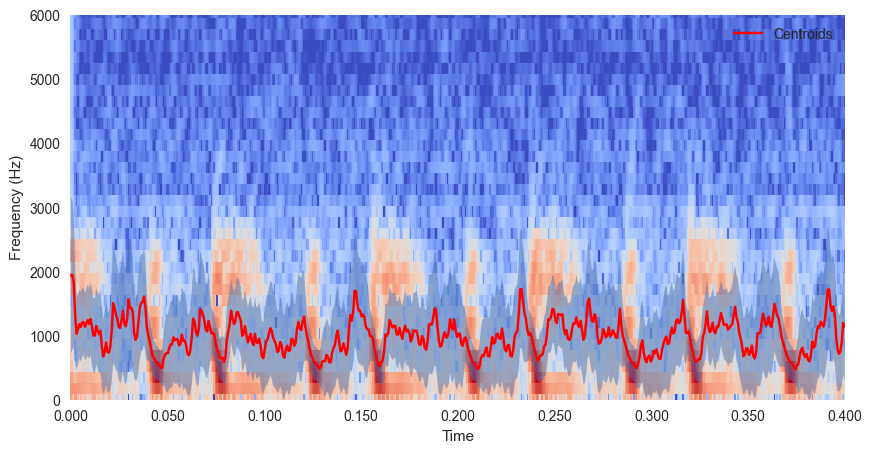

In [214]:
import matplotlib.pyplot as plt
from librosa.display import specshow


# Normalizing
spec = np.array(np.abs(spec))

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Compute spectrogram and spectral centroid
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

# Plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)

# Overlay the spectral centroid, x/10 because graphs were out of sync due to library update 
ax.plot(times_spec/10, centroids, color='red', label='Centroids')
ax.fill_between(times_spec/10, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=0.5)

# Set the y-axis limit for the centroid plot
ax.set_ylim([0, 6000])

# Set the labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Frequency (Hz)')
ax.legend()

# Show the plot
plt.show()


As you can see, the spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a summary of the spectral content that we can use in a classifier.

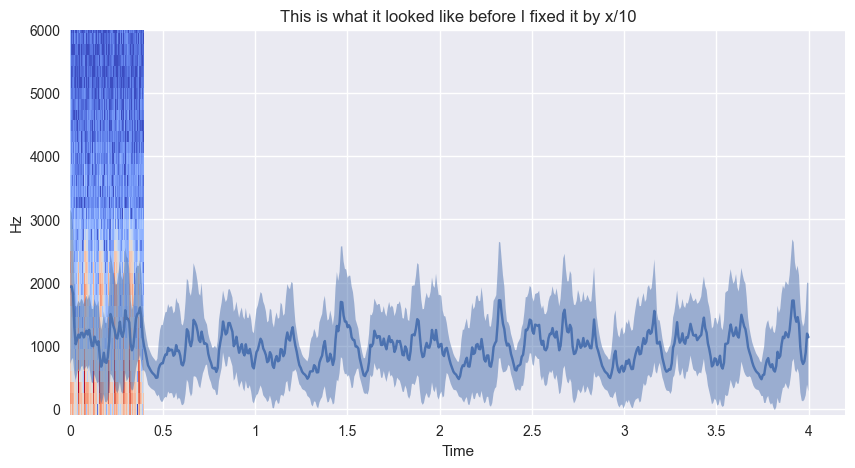

In [215]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.title('This is what it looked like before I fixed it by x/10')
plt.show()

### Combining many features in a classifier
  
You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.
  
The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.
  
For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.
  
1. Loop through each spectrogram, calculating the mean spectral bandwidth and centroid of each.
2. Column stack all the features to create the array X. Score the classifier with cross-validation.

```
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

<script.py> output:
    0.4833333333333333
```

You calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.